In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer 
from sklearn.metrics import mutual_info_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LogisticRegression 

In [29]:
#load the data 
df = pd.read_csv("BikeSharingAssignment.csv")

In [30]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [31]:
#Check for missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

we don't have any missing values :) 

In [32]:
#Check for duplicates
df.duplicated().sum()

0

we don't have any duplicates values :) 

In [33]:
#categorical variables 
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

datetime is categorical variable , so we encoding it 

In [34]:
df['datetime'].nunique()

10886

In [35]:
# divide the date feature in three features day month year , because date feature have very large 
#number of unique valuse 
day = []
month = []
year = []
for i in list(df['datetime']):
    day.append(((i.split(' '))[0].split('-'))[2])
    month.append(((i.split(' '))[0].split('-'))[1])
    year.append(((i.split(' '))[0].split('-'))[0])


In [36]:
df['day'] = day
df['month'] = month
df['year'] = year
df = df.drop(columns=['datetime'])
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,01,01,2011
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01,01,2011
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,01,01,2011
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,01,01,2011
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,01,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012


In [37]:
# get the numerical features to use it after encode the categorical features 
#numerical = [col for col, dtype in df.dtypes.items() if dtype != 'object']
#numerical

In [38]:
print("the values in day feature", df['day'].nunique())
print("the values in month feature", df['month'].nunique())
print("the values in year feature", df['year'].nunique())

the values in day feature 19
the values in month feature 12
the values in year feature 2


In [39]:
#one_hot_encoding 
dicts = df.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
x_train = dv.transform(dicts)
dv.get_feature_names_out()

array(['atemp', 'casual', 'count', 'day=01', 'day=02', 'day=03', 'day=04',
       'day=05', 'day=06', 'day=07', 'day=08', 'day=09', 'day=10',
       'day=11', 'day=12', 'day=13', 'day=14', 'day=15', 'day=16',
       'day=17', 'day=18', 'day=19', 'holiday', 'humidity', 'month=01',
       'month=02', 'month=03', 'month=04', 'month=05', 'month=06',
       'month=07', 'month=08', 'month=09', 'month=10', 'month=11',
       'month=12', 'registered', 'season', 'temp', 'weather', 'windspeed',
       'workingday', 'year=2011', 'year=2012'], dtype=object)

In [40]:
x_train.shape

(10886, 44)

In [41]:
df_encoded = pd.DataFrame(x_train, columns=dv.get_feature_names_out())
df_encoded


,atemp,casual,count,day=01,day=02,day=03,day=04,day=05,day=06,day=07,...,month=11,month=12,registered,season,temp,weather,windspeed,workingday,year=2011,year=2012
0,14.395,3.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,1.0,9.84,1.0,0.0000,0.0,1.0,0.0
1,13.635,8.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,32.0,1.0,9.02,1.0,0.0000,0.0,1.0,0.0
2,13.635,5.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,1.0,9.02,1.0,0.0000,0.0,1.0,0.0
3,14.395,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,1.0,9.84,1.0,0.0000,0.0,1.0,0.0
4,14.395,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.84,1.0,0.0000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19.695,7.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,329.0,4.0,15.58,1.0,26.0027,1.0,0.0,1.0
10882,17.425,10.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,231.0,4.0,14.76,1.0,15.0013,1.0,0.0,1.0
10883,15.910,4.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,164.0,4.0,13.94,1.0,15.0013,1.0,0.0,1.0
10884,17.425,12.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,117.0,4.0,13.94,1.0,6.0032,1.0,0.0,1.0


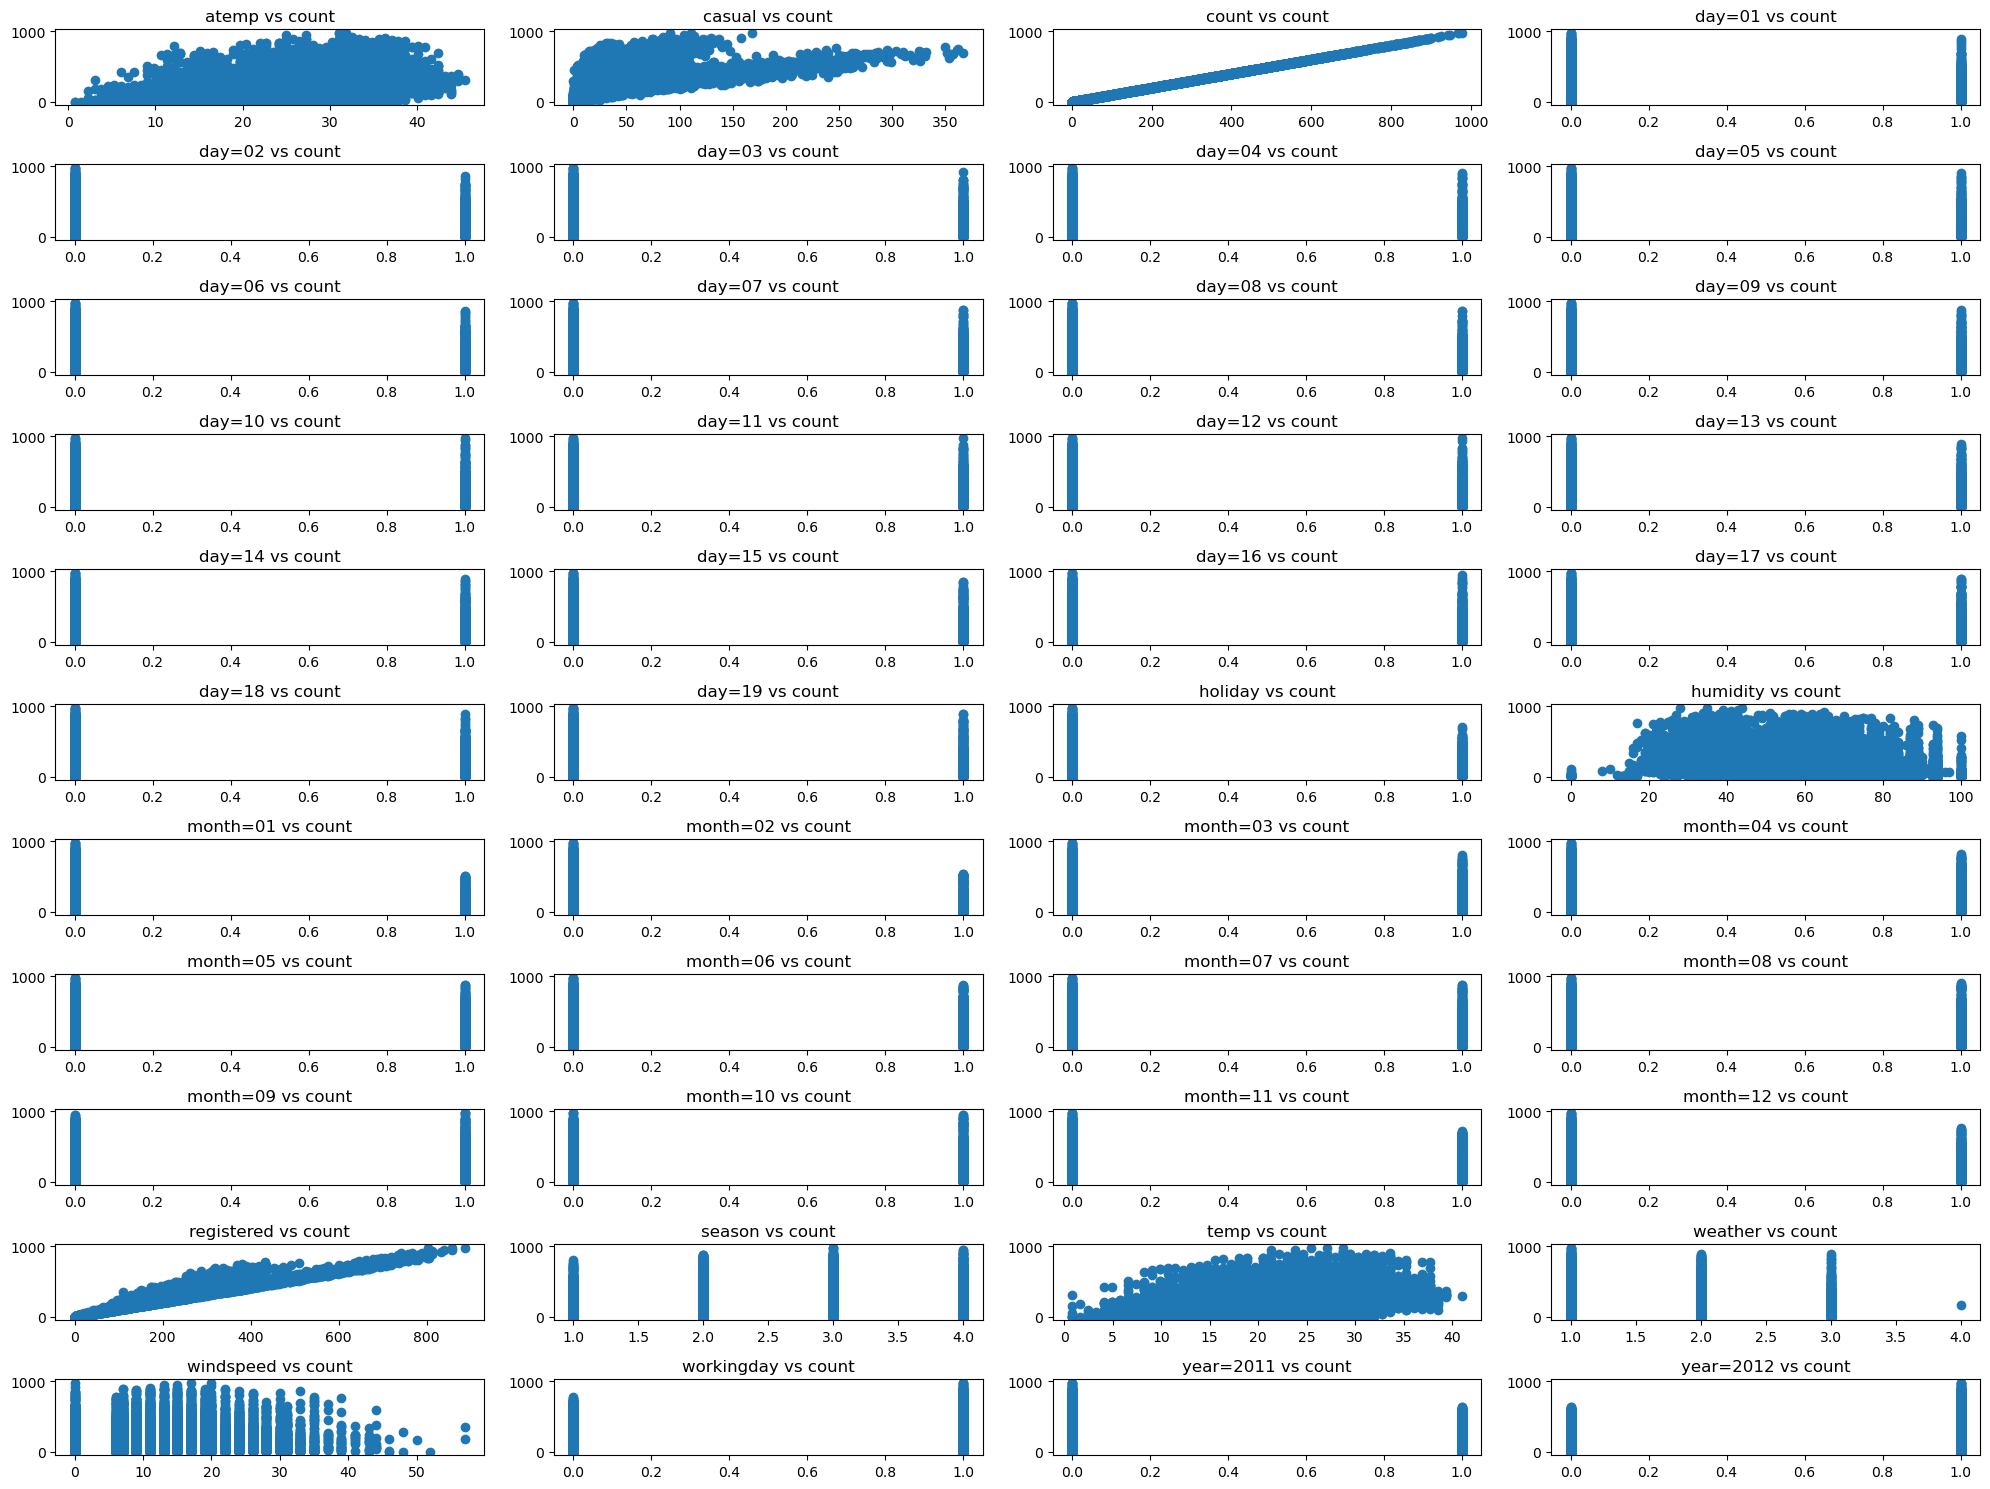

In [42]:

num_columns = len(df_encoded.columns)
num_rows = math.ceil(num_columns / 4)  # Calculate required rows for 4 columns per row

plt.figure(figsize=(20, 15))

for idx, col in enumerate(df_encoded.columns, start=1):
    plt.subplot(num_rows, 4, idx)  # Adjust grid size dynamically
    plt.scatter(df_encoded[col], df_encoded['count'])
    plt.title(f'{col} vs count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



<AxesSubplot:>

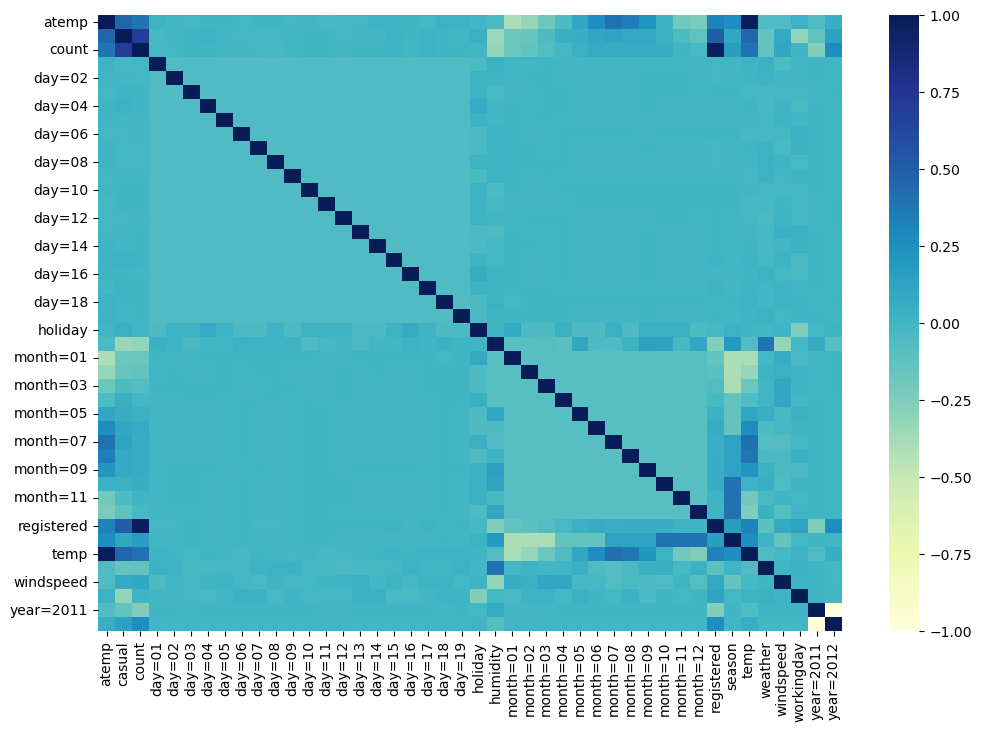

In [43]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [44]:
pairs_with_one = []

# Iterate through the upper triangle of the matrix to avoid duplicates
for i in corr_matrix.columns :
    for j in corr_matrix.columns:
        if corr_matrix.loc[i, j] >= 0.60:
            row = i
            col = j
            if row == col:
                continue
            if (col, row) in pairs_with_one:
                continue
            pairs_with_one.append((row, col))

print("Pairs with correlation value 1:", pairs_with_one)

Pairs with correlation value 1: [('atemp', 'temp'), ('casual', 'count'), ('count', 'registered')]


*we realize that casual feature and registered have  a stronger correlation to the target than other features.

*atemp and temp have a strong correlation (they both affect the target in the same way), we can remove one of them.

In [45]:
def mutual_info_BikeSharing_score(series):
    return mutual_info_score(series, df_encoded['count'])
 
importance_score = df_encoded.drop('count', axis=1).apply(mutual_info_BikeSharing_score)

importance_score

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


atemp         1.105799
casual        2.158600
day=01        0.031600
day=02        0.032321
day=03        0.032093
day=04        0.032159
day=05        0.033310
day=06        0.033326
day=07        0.032510
day=08        0.031313
day=09        0.032936
day=10        0.033889
day=11        0.033778
day=12        0.033152
day=13        0.031246
day=14        0.033984
day=15        0.035382
day=16        0.033925
day=17        0.034259
day=18        0.031538
day=19        0.036329
holiday       0.026729
humidity      1.416000
month=01      0.045888
month=02      0.042274
month=03      0.040580
month=04      0.036830
month=05      0.039019
month=06      0.045036
month=07      0.043998
month=08      0.047792
month=09      0.044611
month=10      0.046452
month=11      0.036678
month=12      0.033248
registered    3.656714
season        0.174893
temp          1.025232
weather       0.082183
windspeed     0.532582
workingday    0.051011
year=2011     0.079138
year=2012     0.079138
dtype: floa

(atemp) have more importance_score than (temp) so we can remove temp 

In [46]:
df_encoded2 = df_encoded.drop('temp', axis=1)

In [47]:
#Train-Test Split:
df_encoded_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=1)
df_encoded_train2, df_test2 = train_test_split(df_encoded2, test_size=0.2, random_state=1)

In [48]:
X_train= df_encoded_train.drop(['count'],axis=1)
y_train= df_encoded_train['count']
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
X_train2= df_encoded_train2.drop(['count'],axis=1)
y_train2= df_encoded_train2['count']
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_true = df_test['count']
y_pred = model.predict(df_test.drop(['count'],axis=1))  

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 35.0184
Root Mean Squared Error (RMSE): 57.0927
R² Score: 0.9044


In [51]:
y_true2 = df_test2['count']
y_pred2 = model2.predict(df_test2.drop(['count'],axis=1))  

# Calculate metrics
mae2 = mean_absolute_error(y_true2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_true2, y_pred2))
r22 = r2_score(y_true2, y_pred2)

print(f"Mean Absolute Error (MAE): {mae2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"R² Score: {r22:.4f}")

Mean Absolute Error (MAE): 34.9679
Root Mean Squared Error (RMSE): 56.4581
R² Score: 0.9065


We relaize that the model's accuracy has improved, and it is now training better.